# Regresión logística multiple
Dado que la función lineal no se puede ajustar a variables catagóricas binarias (0, 1), se hace necesario utilizar la función sigmoide $\sigma(y)$:

$\large{\sigma(y)=\frac{1}{1+e^{-y}}}$

Cuando $y$ toma valores positivos muy grandes, $e^{-y}$ toma volores muy cercanos a cero, lo que ocasiona que la función $\sigma(y)$ tome valores muy cercanos a $1$. Por el contrario, cuando $y$ toma valores negativos muy grandes, $e^{-y}$ toma volores muy cercanos a $+\infty$, lo que ocasiona que la función $\sigma(y)$ tome valores muy cercanos a $0$

Probabilidad de $y$ dado $X$:

$\large{P(y=1|X=x)=\frac{e^{\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{3}+...+\theta_{p}x_{p}}}{1+e^{-(\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{3}+...+\theta_{p}x_{p})}}}$

La regresión logística calcula los logaritmos de las probabilidades de cada variable para transformarlas en 0 o 1, usando un umbral de decisión.

Se conoce como probabilidad de *odds* a la razón entre la probabilidad de aciertos y desaciertos:

$\large{odds = \frac{P(y=1|X;\theta)}{P(y=0|X;\theta)}}$

entonces,

$\large{\ln{\frac{P(y=1|X;\theta)}{P(y=0|X;\theta)}}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{3}+...+\theta_{p}x_{p}}$

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Leer el dataset final generado por el notebook M02_05
df = pd.read_csv('DataReg.csv', header = 0)

In [26]:
df.head()

,precio,area_resid,cal_aire,num_hab,edad,prof_mil,p-pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,Vendida,prom_dist,aeropuerto_SI,cuerpo_agua_Lago,cuerpo_agua_Lago y rio,cuerpo_agua_Rio
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


## Creación de los set de entrenamiento y validación, modelado

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
X = df.loc[:, df.columns != 'Vendida']
y = df['Vendida']

In [29]:
# Obtener los cuatro conjuntos de datos necesarios para el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [32]:
# Crear el modelo aumentando las iteraciones dado que no se llega
# a ajustar el modelo con menos iteraciones
reg_model = LogisticRegression(max_iter = 900)

In [33]:
# Ajustar el modelo a los datos
reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [34]:
# Intercepto theta(0)
reg_model.intercept_

array([-2.67910644])

In [35]:
# Coeficiente de las variables predictoras
reg_model.coef_.reshape(-1,4)

array([[-0.2656961 ,  0.01086472, -1.38371538,  0.98830839],
       [-0.00402203,  0.30360361, -0.21857159,  0.19075335],
       [-0.07170099, -0.0097345 , -0.05253779, -0.32562462],
       [-0.21087867, -0.0351414 , -0.04254725,  0.39430661]])

In [36]:
y_pred = reg_model.predict(X_test)

In [37]:
y_pred.astype(bool), y_test.to_numpy().astype(bool)

(array([ True,  True, False, False, False,  True, False,  True, False,
        False,  True,  True, False,  True, False,  True, False, False,
        False,  True, False, False, False, False, False,  True,  True,
        False,  True,  True, False,  True,  True, False,  True, False,
         True,  True, False, False, False, False, False, False, False,
         True,  True,  True, False,  True,  True, False, False, False,
         True,  True, False, False, False, False,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True, False,  True,
        False, False,  True, False,  True, False,  True, False,  True,
         True,  True, False, False,  True,  True,  True, False,  True,
         True,  True, False,  True, False,  True, False, False,  True,
         True, False, False]),
 array([ True,  True, False,  True,  True,  True,  True, False, False,
        False, False, False, False, False, False,  True,  True, False,
        False, False,  True, False, False, Fal

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,y_pred)

array([[36, 20],
       [16, 30]], dtype=int64)

In [40]:
mc = pd.DataFrame(confusion_matrix(y_test,y_pred), index = ['No vendidaR','VendidaR'], columns = ['No vendidaP', 'VendidaP'])
mc

,No vendidaP,VendidaP
No vendidaR,36,20
VendidaR,16,30


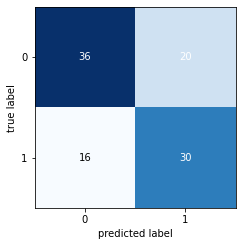

In [41]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6), show_normed=False)
plt.tight_layout(pad = 10)

![Matriz de confusión](confmat.png)
![Metricas](metricas.jpg)

**Precision:** mide la calidad de los modelos de ML en el desarrollo de la clasificación, para el problema nos indica que porcentaje de propiedades serán vendidas o no.

**Recall (Exhaustividad):** muestra la proporción de ejemplos que el modelo es capaz de identificar, indica que porcentaje de propiedades de las que serán vendidas o no podemos indentificar.

**Accuracy (Exactitud):** mide el porcentaje de los casos en que el modelo ha acertado, no debe interpretarse sola porque es una de las métricas que nos puede llevar a tomar decisiones incorrectas porque nos puede indicar que un modelo deficiente parezca mejor de lo que en realidad es.

**Sensibilidad:** detecta en la realidad los casos positivos, representa la probabilidad de los verdaderos positivos en la predicción.

$Sensibilidad=\frac{TP}{TP+FN}$

**Especificidad:** detecta en la realidad los casos negativos, representa la probabilidad de los verdaderos negativos en la predicción.

In [ ]:
import statsmodels.api as sn
import statsmodels.discrete.discrete_model as sm

In [ ]:
# Crear la columna con la constante solicitada para el modelo Logit
const_X = sn.add_constant(X_train)

In [ ]:
const_X

In [ ]:
logit = sm.Logit(y_train, const_X).fit()

In [ ]:
# Ver estadisticos y los valores de los parámetros de las variables predictoras
logit.summary()

In [ ]:
# Se eliminan los atributos con valores por encima de
# la significancia de los parámetros
columnas = ['edad', 'cuerpo_agua_Lago', 'cuerpo_agua_Lago y rio']

const_X = const_X.drop(columns = columnas)

logit1 = sm.Logit(y_train, const_X).fit()
logit1.summary()

In [ ]:
columnas = ['lluvia_ano', 'area_resid', 'aeropuerto_SI']

const_X = const_X.drop(columns = columnas)

logit2 = sm.Logit(y_train, const_X).fit()
logit2.summary()

In [ ]:
columnas = ['n_hab_hotel', 'parque']

const_X = const_X.drop(columns = columnas)

logit3 = sm.Logit(y_train, const_X).fit()
logit3.summary()

## Rendimiento del modelo

In [ ]:
# Lista con los valores de los atributos finales del modelo
col_final = ['precio', 'cal_aire', 'num_hab', 'prof_mil', 'p-pobreza', 'n_cam_hos', 'prom_dist', 'cuerpo_agua_Rio']

In [ ]:
# Agregar columna de la constante para poder aplicar el modelo Logit
X_test = sn.add_constant(X_test[col_final])
y_pred_train = logit3.predict(const_X)
y_pred_train

In [ ]:
# Como las predicciones están dadas en probabilidades se convierten
# a uno las que esten por encima de 0.5, de lo contrario la clase es 0
y_pred_train = y_pred_train.apply(lambda x: 1 if x > 0.5 else 0)
y_pred_train

In [ ]:
# Realizar las predicciones en el conjunto de validación
y_pred_test = logit3.predict(X_test)

In [ ]:
y_pred_test = y_pred_test.apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
y_pred_test

### Exactitud *(Accuracy)*

In [ ]:
# Modulo para realizar la métrica de la exactitud
from sklearn.metrics import accuracy_score 

In [ ]:
accuracy_ent = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Exactitud del modelo con datos de entrenamiento: ', accuracy_ent)
print('Exactitud del modelo con datos de validación: ', accuracy_test)

In [ ]:
reg_model.fit(X_train[col_final], y_train).score(X_test[col_final], y_test)

### Matriz de confusión

In [ ]:
confusion_matrix(y_train, y_pred_train)

In [ ]:
confusion_matrix(y_test, y_pred_test)

In [ ]:
# Si se desea trabajar con las probabilidades de sklearn se usa la función predic_proba()
# e igualmente se puede manipular el umbral de decisión de la clase
y_pred_sk = (reg_model.predict_proba(X_train[col_final])[:, 1]>0.3)
y_pred_sk, confusion_matrix(y_pred_train, y_pred_sk)

In [ ]:
confusion_matrix(y_train, y_pred_sk)

### Otras métricas (Precisión, Recall, AUC)

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [ ]:
precision_score(y_train, y_pred_train)

In [ ]:
recall_score(y_train, y_pred_train)

In [ ]:
roc_auc_score(y_train, y_pred_train)

In [ ]:
x_roc, y_roc, _ = roc_curve(y_test, reg_model.predict_proba(X_test[col_final])[:, 1]) # Devuelve tres valores
# Tasas de falsos positivos, Tasas de verdaderos positivos, umbrales

x_roc, y_roc, _

In [ ]:
plt.plot(x_roc, y_roc, marker = '.', label = 'Curva ROC modelo de Regresión logística')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')